Here is the code that gave the final time memory plots 

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import numpy as np
import math
import sys
sys.path.insert(1, '../')

from kTree import *
import dissection_optimize
import layered_dissections
from dissection import *

load("../Wave_param.py")

n = 7236
k = 4892
w = 6862

## Preparation of the plots

In [2]:
ktreeLabel = "k-tree"
StateofTheArtRef = "k-tree + representations [2]"
resol = 200

def preparePlot(includePoint = True):
    plt.figure(figsize = (10,7))
    plt.xlabel("$\log(M)/n$", fontsize=16)
    plt.ylabel("$\log(T)/n$", fontsize=16)
    if includePoint:
        plt.scatter(0.0176, 0.0176, label=StateofTheArtRef, s=40, marker="d",c ="silver")
        

<>:7: DeprecationWarning: invalid escape sequence \l
<>:8: DeprecationWarning: invalid escape sequence \l
<>:7: DeprecationWarning: invalid escape sequence \l
<>:8: DeprecationWarning: invalid escape sequence \l
<ipython-input-2-25ca0b76d733>:7: DeprecationWarning: invalid escape sequence \l
  plt.xlabel("$\log(M)/n$", fontsize=Integer(16))
<ipython-input-2-25ca0b76d733>:8: DeprecationWarning: invalid escape sequence \l
  plt.ylabel("$\log(T)/n$", fontsize=Integer(16))


## Find the best time memory trade-offs for the dissection
(h=1 - not layered dissection - asymptotic)

The following block takes a few minutes
To reduce this time (at the cost of having less points and less precision), reduce the value of "r" or "nbMem"

In [3]:
r = 400
nbMem=150

def compute_best_complexity_dissection(r=120, final_treatement=True): 
    M_tot = [];T_tot = [];cols_tot = []

    #Res = np.append(np.linspace(0.001, 0.025, 25), np.linspace(0.025, 0.034, 10))
    Res = np.linspace(0.001,0.034, 50)


    for Re in Res:
        (M,T,_) = dissection(r, R, Re,W, nbMem=nbMem)
        #plt.scatter(M,T, label="l" + r'$ \approx$' + str(round(Re,4)) + "n", s=20)
        #plt.scatter(M,T, label="l = " + str(round(Re,4)) + "n", s=20)
        #plt.scatter(M,T, s=20)
        M_tot = np.append(M_tot, M)
        T_tot = np.append(T_tot, T)
    if final_treatement:
        M_tot, T_tot = clean_array(M_tot,T_tot, [])

    return M_tot,T_tot


M_dissec,T_dissec = compute_best_complexity_dissection(r)

# Asymptotic cost plot
(should take less than one minute)

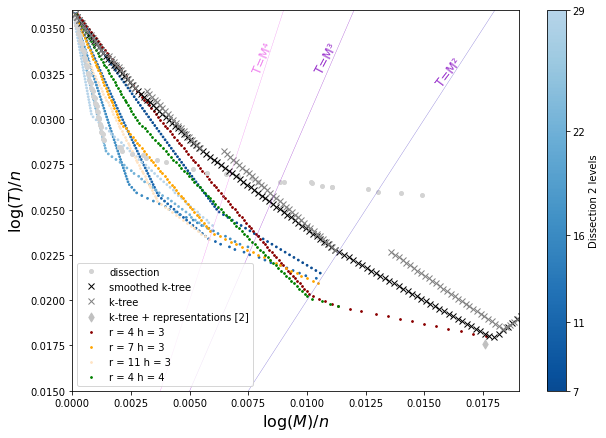

In [9]:
preparePlot()

Remin = 0.001
Remax = 0.2
npoints = 400


# Customized cmap
Blues_modified = cm.get_cmap('Blues', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
#Oranges_modified = cm.get_cmap('Oranges', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
cmap2 = ListedColormap(Blues_modified(np.linspace(0.9, 0.3, 256)))
#cmap3 = ListedColormap(Oranges_modified(np.linspace(0.9, 0.3, 256)))

# Set x,y limits
axes = plt.gca()
axes.set_ylim([0.015,0.036])
axes.set_xlim([0.0*math.log(3,2),0.0120*math.log(3,2)])


## Plotting level 2 dissections
h = 2
Interesting_dissections_two = [7,11,16,22,29]
M = []
T = []
track_colormap = [] 
for X in Interesting_dissections_two:
    (memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
    track_colormap = np.append(track_colormap, [X for _ in range(0, len(memories))])
    M = np.append(M, memories)
    T = np.append(T, times)

plt.scatter(M, T, s = 3, c = track_colormap, cmap = cmap2)
cbar = plt.colorbar()
cbar.set_label('Dissection 2 levels')
cbar.set_ticks([7,11,16,22,29])
cbar.set_ticklabels(["7","11","16","22","29"])

## Plotting level 3 dissectiropositionons
h = 3
Interesting_dissections_three = [4,7,11]
colors = ["darkred", "orange", "bisque"]; icols = 0
for X in Interesting_dissections_three:
    (memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
    plt.scatter(memories, times, s=3, c=colors[icols], label = "r = " +str(X) + " h = " +str(h))
    icols = icols + 1


h = 4
X = 4
(memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
plt.scatter(memories, times, s = 3, c="green", label="r = 4 h = 4")


plt.plot(M_dissec,T_dissec, markersize = 4, linewidth = 0, color = "lightgray", marker = 'o', label = "dissection")

mems,complexities, Reused,_  = smoothed_kTree(R, W,npoints=npoints, Remin=Remin,Remax = Remax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "black", marker = 'x', label = "smoothed k-tree")

mems,complexities, Reused,_  = kTree(R, W,npoints=npoints, Remin=Remin, Remax = Remax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "grey", marker = 'x', label = "k-tree ")


TMM = [2*m for m in mems]
TMMM = [3*m for m in mems]
TMMMM = [4*m for m in mems]

plt.plot(mems, TMM, "slateblue", linewidth=0.3)
plt.plot(mems, TMMM, "darkorchid", linewidth=0.3)
plt.plot(mems, TMMMM, "violet", linewidth=0.3)



# write text

l1 = np.array((58./n, 235./n))
angle = 66.5
th1 = plt.text(l1[0], l1[1], "T=M⁴", fontsize=12,
               rotation=angle, rotation_mode='anchor', c="violet")

l1 = np.array((77./n, 235./n))
angle = 62
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M³', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")


l1 = np.array((114./n, 230./n))
angle = 52.5
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M²', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")

plt.legend(loc='lower left')


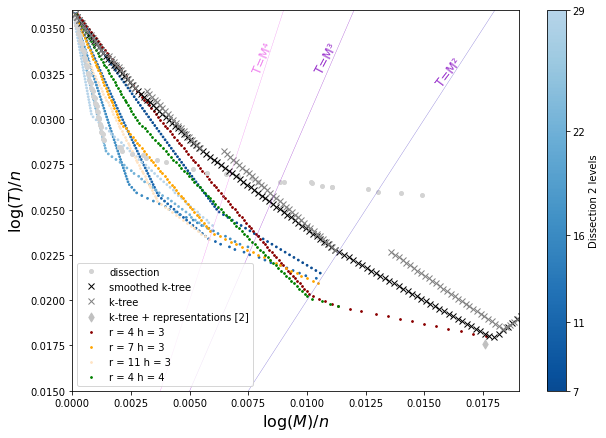

In [5]:
preparePlot()

Remin = 0.001
Remax = 0.2
npoints = 400


# Customized cmap
Blues_modified = cm.get_cmap('Blues', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
#Oranges_modified = cm.get_cmap('Oranges', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
cmap2 = ListedColormap(Blues_modified(np.linspace(0.9, 0.3, 256)))
#cmap3 = ListedColormap(Oranges_modified(np.linspace(0.9, 0.3, 256)))

# Set x,y limits
axes = plt.gca()
axes.set_ylim([0.015,0.036])
axes.set_xlim([0.0*math.log(3,2),0.0120*math.log(3,2)])


## Plotting level 2 dissections
h = 2
Interesting_dissections_two = [7,11,16,22,29]
M = []
T = []
track_colormap = [] 
for X in Interesting_dissections_two:
    (memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
    track_colormap = np.append(track_colormap, [X for _ in range(0, len(memories))])
    M = np.append(M, memories)
    T = np.append(T, times)

plt.scatter(M, T, s = 3, c = track_colormap, cmap = cmap2)
cbar = plt.colorbar()
cbar.set_label('Dissection 2 levels')
cbar.set_ticks([7,11,16,22,29])
cbar.set_ticklabels(["7","11","16","22","29"])

## Plotting level 3 dissectiropositionons
h = 3
Interesting_dissections_three = [4,7,11]
colors = ["darkred", "orange", "bisque"]; icols = 0
for X in Interesting_dissections_three:
    (memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
    plt.scatter(memories, times, s=3, c=colors[icols], label = "r = " +str(X) + " h = " +str(h))
    icols = icols + 1


h = 4
X = 4
(memories, times,_, Res) = layered_dissections.Apply(X, h, R,W, Remin=Remin, Remax=Remax, nbRes=npoints)
plt.scatter(memories, times, s = 3, c="green", label="r = 4 h = 4")


plt.plot(M_dissec,T_dissec, markersize = 4, linewidth = 0, color = "lightgray", marker = 'o', label = "dissection")

mems,complexities, Reused,_  = smoothed_kTree(R, W,npoints=npoints, Remin=Remin,Remax = Remax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "black", marker = 'x', label = "smoothed k-tree")

mems,complexities, Reused,_  = kTree(R, W,npoints=npoints, Remin=Remin, Remax = Remax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "grey", marker = 'x', label = "k-tree ")


TMM = [2*m for m in mems]
TMMM = [3*m for m in mems]
TMMMM = [4*m for m in mems]

plt.plot(mems, TMM, "slateblue", linewidth=0.3)
plt.plot(mems, TMMM, "darkorchid", linewidth=0.3)
plt.plot(mems, TMMMM, "violet", linewidth=0.3)



# write text

l1 = np.array((58./n, 235./n))
angle = 66.5
th1 = plt.text(l1[0], l1[1], "T=M⁴", fontsize=12,
               rotation=angle, rotation_mode='anchor', c="violet")

l1 = np.array((77./n, 235./n))
angle = 62
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M³', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")


l1 = np.array((114./n, 230./n))
angle = 52.5
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M²', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")

plt.legend(loc='lower left')


# Bit cost
(should take no more than a few minutes)

<>:118: DeprecationWarning: invalid escape sequence \l
<>:119: DeprecationWarning: invalid escape sequence \l
<>:118: DeprecationWarning: invalid escape sequence \l
<>:119: DeprecationWarning: invalid escape sequence \l
<ipython-input-12-fded27079732>:118: DeprecationWarning: invalid escape sequence \l
  plt.xlabel("$\log(M)$")
<ipython-input-12-fded27079732>:119: DeprecationWarning: invalid escape sequence \l
  plt.ylabel("$\log(T)$")


Text(0, 0.5, '$\\log(T)$')

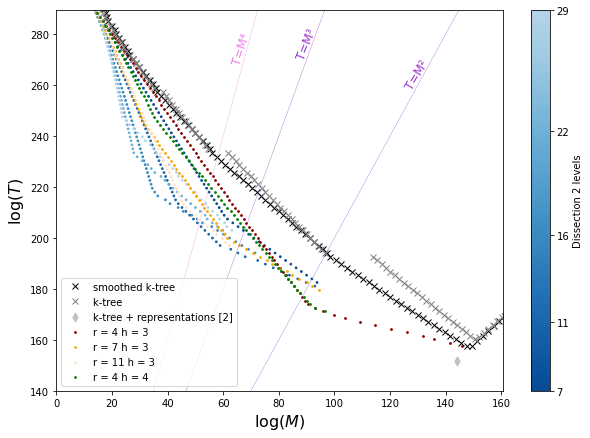

In [12]:
n = 7236
k = 4892
w = 6862

preparePlot(False)
import matplotlib as mpl

lmin = 2
lmax = int(n*0.08)
nbls = 100
nbtarget=50

a=7
l = int(n*0.060835)
#coeff_mem = math.log(2**a*2*n,2) # Number of lists times vector size times F3 coeff
#coeff_times = math.log((2**a-1)*(2*l + 2*2*l/a),2) #  number of considered mergings times (addition cost + merging cost)
coeff_mem = math.log(2**a*2*(l+(k+l)/2**a),2) # Number of lists times F3 coeff times number of coordinates stored
coeff_times = math.log((2**a-1)*(2*l + 2*2*l/a) + (n-k-l)*(k+l)*2,2) #  number of considered mergings times (addition cost + merging cost + on-the-fly check)



plt.scatter(0.0176*n+coeff_mem, 0.0176*n+coeff_times, label=StateofTheArtRef, s=40, marker="d",c ="silver")



# Customized cmap
Blues_modified = cm.get_cmap('Blues', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
#Oranges_modified = cm.get_cmap('Oranges', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
cmap2 = ListedColormap(Blues_modified(np.linspace(0.9, 0.3, 256)))
#cmap3 = ListedColormap(Oranges_modified(np.linspace(0.9, 0.3, 256)))

# Set x,y limits
axes = plt.gca()
axes.set_ylim([140,0.04*n])
axes.set_xlim([0.0*math.log(3,2)*n,0.0140*math.log(3,2)*n])


## Plotting level 2 dissections
h = 2
Interesting_dissections_two = [7,11,16,22,29]
M = []
T = []
track_colormap = [] 
for X in Interesting_dissections_two:
    (memories, times,_, Res) = layered_dissections.real_Apply(n, k, w, X, h, lmin, lmax, nbls=nbls, nbtarget=nbtarget)
    track_colormap = np.append(track_colormap, [X for _ in range(0, len(memories))])
    M = np.append(M, memories)
    T = np.append(T, times)

plt.scatter(M, T, s = 3, c = track_colormap, cmap = cmap2)



cbar = plt.colorbar()
cbar.set_label('Dissection 2 levels')
cbar.set_ticks([7,11,16,22,29])
cbar.set_ticklabels(["7","11","16","22","29"])
## Plotting level 3 dissections
h = 3
Interesting_dissections_three = [4,7,11]
colors = ["darkred", "orange", "bisque"]; icols = 0
for X in Interesting_dissections_three:
    (memories, times,_, Res) = layered_dissections.real_Apply(n, k, w, X, h, lmin, lmax, nbls=nbls, nbtarget=nbtarget)
    plt.scatter(memories, times, s=3, c=colors[icols], label = "r = " +str(X) + " h = " +str(h))
    icols = icols + 1


h = 4
X = 4
(memories, times,_, Res) = layered_dissections.real_Apply(n, k, w, X, h, lmin, lmax, nbls=nbls, nbtarget=nbtarget)
plt.scatter(memories, times, s = 3, c="green", label="r = 4 h = 4")


#dissection + Wave TM
#plt.plot(2/11*0.060835*math.log(3,2),2/11*0.060835*math.log(3,2),"silver", label="Wave",marker=".", linewidth = 0, markersize = 8)



#plt.plot(M_dissec,T_dissec, markersize = 4, linewidth = 0, color = "lightgray", marker = 'o', label = "Dissection")

mems,complexities, Reused = real_smoothed_kTree(n,k, w,npoints=nbls,lmin=lmin, lmax=lmax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "black", marker = 'x', label = "smoothed k-tree")

mems,complexities, Reused  = real_kTree(n,k, w,npoints=nbls,lmin=lmin, lmax=lmax)
plt.plot(mems,complexities, markersize = 6, linewidth = 0, color = "grey", marker = 'x', label = "k-tree ")

TMM = [2*m for m in mems]
TMMM = [3*m for m in mems]
TMMMM = [4*m for m in mems]

plt.plot(mems, TMM, "slateblue", linewidth=0.3)
plt.plot(mems, TMMM, "darkorchid", linewidth=0.3)
plt.plot(mems, TMMMM, "violet",  linewidth=0.3)

# write text

l1 = np.array((66, 268))
angle = 72
th1 = plt.text(l1[0], l1[1], "T=M⁴", fontsize=12,
               rotation=angle, rotation_mode='anchor', c="violet")

l1 = np.array((89, 270))
angle = 68
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M³', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")


l1 = np.array((128, 258))
angle = 59
# Plot text
th1 = plt.text(l1[0], l1[1], 'T=M²', fontsize=12,
               rotation=angle, rotation_mode='anchor', c="darkorchid")


plt.legend(loc='lower left')
#plt.title("Timle")
plt.xlabel("$\log(M)$")
plt.ylabel("$\log(T)$")

